# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Liquidity modelling

</font>
</div>

# Imports
<hr style = "border:2px solid black" ></hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('use_inf_as_na', True)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Import data
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- ask (`ASKHI`)
- bid (`BIDLO`)
- open (`OPENPRC`)
- trading price (`PRC`) 
- volume (`VOL`)
- return (`RET`)
- volume-weighted return (`vwretx`) of the stock
- number of shares outstanding (`SHROUT`):

</font>
</div>

In [2]:
liq_data = pd.read_csv('./bid_ask.csv')

In [3]:
liq_data.head()

,Unnamed: 0,Date,EXCHCD,TICKER,COMNAM,BIDLO,ASKHI,PRC,VOL,RET,SHROUT,OPENPRC,vwretx
0,1031570,2019-01-02,3.0,INTC,INTEL CORP,45.77,47.470,47.08,18761673.0,0.003196,4564000.0,45.960,0.001783
1,1031571,2019-01-03,3.0,INTC,INTEL CORP,44.39,46.280,44.49,32254097.0,-0.055013,4564000.0,46.150,-0.021219
2,1031572,2019-01-04,3.0,INTC,INTEL CORP,45.54,47.570,47.22,35419836.0,0.061362,4564000.0,45.835,0.033399
3,1031573,2019-01-07,3.0,INTC,INTEL CORP,46.75,47.995,47.44,22724997.0,0.004659,4564000.0,47.100,0.009191
4,1031574,2019-01-08,3.0,INTC,INTEL CORP,46.78,48.030,47.74,22721240.0,0.006324,4564000.0,47.800,0.010240


# Pre-processing
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Calculating some liquidity measures requires a rolling-window estimation, such as the calculation of the bid price for five days. 
- To accomplish this task, the list named `rolling_five` is generated using the following code.

</font>
</div>

In [4]:
rolling_five = []

for j in liq_data.TICKER.unique():
    for i in range(len(liq_data[liq_data.TICKER == j])):
        rolling_five.append(liq_data[i:i+5].agg({'BIDLO': 'min',
                                                'ASKHI': 'max',
                                                 'VOL': 'sum',
                                                 'SHROUT': 'mean',
                                                 'PRC': 'mean'}))

In [5]:
rolling_five_df = pd.DataFrame(rolling_five)
rolling_five_df.columns = ['bidlo_min', 'askhi_max', 'vol_sum',
                           'shrout_mean', 'prc_mean']
liq_vol_all = pd.concat([liq_data, rolling_five_df], axis=1)

In [6]:
liq_vol_all

,Unnamed: 0,Date,EXCHCD,TICKER,COMNAM,BIDLO,ASKHI,PRC,VOL,RET,SHROUT,OPENPRC,vwretx,bidlo_min,askhi_max,vol_sum,shrout_mean,prc_mean
0,1031570,2019-01-02,3.0,INTC,INTEL CORP,45.77000,47.4700,47.08000,18761673.0,0.003196,4564000.0,45.960,0.001783,44.39,48.0300,131881843.0,4564000.0,46.794
1,1031571,2019-01-03,3.0,INTC,INTEL CORP,44.39000,46.2800,44.49000,32254097.0,-0.055013,4564000.0,46.150,-0.021219,44.39,48.5700,135665761.0,4564000.0,46.980
2,1031572,2019-01-04,3.0,INTC,INTEL CORP,45.54000,47.5700,47.22000,35419836.0,0.061362,4564000.0,45.835,0.033399,45.54,48.6500,130597339.0,4564000.0,47.794
3,1031573,2019-01-07,3.0,INTC,INTEL CORP,46.75000,47.9950,47.44000,22724997.0,0.004659,4564000.0,47.100,0.009191,46.75,49.2910,116906594.0,4564000.0,48.136
4,1031574,2019-01-08,3.0,INTC,INTEL CORP,46.78000,48.0300,47.74000,22721240.0,0.006324,4564000.0,47.800,0.010240,46.78,49.2910,113367907.0,4564000.0,48.318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,66125,2019-12-24,1.0,IBM,INTERNATIONAL BUSINESS MACHS COR,134.61000,135.6200,134.98000,1202087.0,-0.004205,885637.0,135.610,0.000268,59.16,60.4800,58998945.0,4350000.0,59.756
752,66126,2019-12-26,1.0,IBM,INTERNATIONAL BUSINESS MACHS COR,134.64999,135.3055,134.91000,2130706.0,-0.000519,885637.0,134.980,0.004530,59.35,101.7500,88043811.0,5016600.0,68.098
753,66127,2019-12-27,1.0,IBM,INTERNATIONAL BUSINESS MACHS COR,134.87000,135.7500,135.27000,2752706.0,0.002668,885637.0,135.000,-0.000714,59.36,101.7500,119138755.0,5683200.0,75.614
754,66128,2019-12-30,1.0,IBM,INTERNATIONAL BUSINESS MACHS COR,132.50000,135.3000,132.81000,4118937.0,-0.018186,885637.0,135.200,-0.005336,59.36,102.5100,149094570.0,6349800.0,83.984


# Liquidity Ratio
<hr style = "border:2px solid black" ></hr>

In [7]:
liq_ratio = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        liq_ratio.append((liq_vol_all['PRC'][i+1:i+6] * 
                          liq_vol_all['VOL'][i+1:i+6]).sum()/
                         (np.abs(liq_vol_all['PRC'][i+1:i+6].mean() - 
                                 liq_vol_all['PRC'][i:i+5].mean())))

In [8]:
liq_ratio 

[34154350057.203007,
 7663219549.275251,
 16457720701.22779,
 30099586322.198624,
 31887776308.372643,
 221635499376.65826,
 269105052703.8787,
 100959082583.44852,
 348382917486.1337,
 40845182056.212776,
 21445833439.96929,
 35710432425.59423,
 21011934240.443756,
 29319096924.855183,
 131446571676.49113,
 18984929238.863686,
 23014757698.757328,
 14199786157.410288,
 11141384880.461166,
 15956411817.754192,
 16292695524.431393,
 271507868451.2949,
 64704734311.224884,
 inf,
 43499701093.15896,
 14172669088.670774,
 8370542049.574468,
 8828572182.50957,
 17580472102.970802,
 25476786893.299477,
 16596004234.612818,
 19144217526.006218,
 15214064769.617794,
 14581970677.567667,
 17866866968.032124,
 29883190103.39524,
 29247895505.05842,
 57642593127.33569,
 86742742158.62094,
 69558203738.89311,
 29945279552.925262,
 40254959898.1373,
 215144316921.30917,
 18804443749.330585,
 34599217833.39154,
 20147999032.9735,
 48826018079.998146,
 60003199854.17149,
 64729629151.45906,
 28086269

# Hui-Heubel liquidity ratio
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>


</font>
</div>

In [9]:
Lhh = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        Lhh.append((liq_vol_all['PRC'][i:i+5].max() - 
                    liq_vol_all['PRC'][i:i+5].min()) /  
                   liq_vol_all['PRC'][i:i+5].min() /  
                   (liq_vol_all['VOL'][i:i+5].sum() / 
                    liq_vol_all['SHROUT'][i:i+5].mean() * 
                    liq_vol_all['PRC'][i:i+5].mean()))

# Turnover ratio
<hr style = "border:2px solid black" ></hr>

In [10]:
turnover_ratio = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        turnover_ratio.append((1/liq_vol_all['VOL'].count()) * 
                              (np.sum(liq_vol_all['VOL'][i:i+1]) / 
                               np.sum(liq_vol_all['SHROUT'][i:i+1])))

In [11]:
liq_vol_all['liq_ratio'] = pd.DataFrame(liq_ratio)
liq_vol_all['Lhh'] = pd.DataFrame(Lhh)
liq_vol_all['turnover_ratio'] = pd.DataFrame(turnover_ratio)

# Transaction Cost-base liquidity measures
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>


- Transaction cost is a cost an investor must bear during trade. It is referred to as any expenses related to the execution of trade. It can be splitted in two:
    - **Explicit cost** relates to order processing, taxes, and brokerage fees
    - **Implicit cost** includes more latent costs, such as bid-ask spread, timing of execution, and so on.

- Transaction cost is related to the tightness and immediacy dimensions of liquidity. 
    
- High transaction costs discourage investors to trade and this, in turn, decreases the number of buyers and sellers in the market so that the trading place diverges away from the more centralized market into a fragmented one, which result in a shallow market. To the extent that transaction cost is low, investors are
willing to trade and this results in a flourished trading environment in which markets will be more centralized.

- Similarly, an abundance of buyers and sellers in a low transaction cost environment refers to the fact that a large number of orders are traded in a short period of time. So, immediacy is the other dimension of liquidity, which is closely related to the transaction cost.
    
</font>
</div>

### Bid-Ask Spreads

<div class="alert alert-info">
<font color=black>
    
- Even though there is an ongoing debate about the goodness of bid-ask spread as well as the assurance that these models provide, bid-ask spread is a widely recognized proxy for transaction cost. 

- To the extent that bid-ask spread is a good analysis of transaction cost, it is also a good indicator of liquidity by which the ease of converting an asset into cash (or a cash equivalent) might be determined. 
    
- The other two well-known bid-ask spreads are:
    - percentage quoted
    - percentage effective bid-ask spreads

</font>
</div>

In [12]:
liq_vol_all['mid_price'] = (liq_vol_all.ASKHI + liq_vol_all.BIDLO) / 2
liq_vol_all['percent_quoted_ba'] = (liq_vol_all.ASKHI - 
                                    liq_vol_all.BIDLO) / \
                                    liq_vol_all.mid_price
liq_vol_all['percent_effective_ba'] = 2 * abs((liq_vol_all.PRC - 
                                               liq_vol_all.mid_price)) / \
                                               liq_vol_all.mid_price

In [13]:
liq_vol_all[['mid_price', 'percent_quoted_ba', 'percent_effective_ba']]

,mid_price,percent_quoted_ba,percent_effective_ba
0,46.620000,0.036465,0.019734
1,45.335000,0.041690,0.037278
2,46.555000,0.043604,0.028568
3,47.372500,0.026281,0.002850
4,47.405000,0.026369,0.014134
...,...,...,...
751,135.115000,0.007475,0.001998
752,134.977745,0.004856,0.001004
753,135.310000,0.006504,0.000591
754,133.900000,0.020911,0.016281


### Roll's Spread

<div class="alert alert-info">
<font color=black>

- Assuming that the market is efficient and the probability of distribution of observed price changes is stationary, Roll’s spread **is motivated by** the fact that serial correlation of price changes is a good proxy for liquidity.

- One of the most important things to note in calculating Roll’s spread is that positive covariance is not well-defined, and it consists of almost half of the cases. The literature puts forth several methods to remedy this shortcoming, and we’ll embrace one of this.

</font>
</div>

In [14]:
liq_vol_all['price_diff'] = liq_vol_all.groupby('TICKER')['PRC']\
                            .apply(lambda x:x.diff())
liq_vol_all.dropna(inplace=True)
roll = []

for j in liq_vol_all.TICKER.unique():
     for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        roll_cov = np.cov(liq_vol_all['price_diff'][i:i+5], 
                          liq_vol_all['price_diff'][i+1:i+6])
        if roll_cov[0,1] < 0:
            roll.append(2 * np.sqrt(-roll_cov[0, 1]))
        else:
             roll.append(2 * np.sqrt(np.abs(roll_cov[0, 1])))


### Corwin and Schultz (2012)

<div class="alert alert-info">
<font color=black>

- The Corwin-Schultz spread is rather intuitive and easy to apply. 
- It rests mainly on the following assumption: given that the daily high and low prices are typically buyer and seller initiated, respectively, the observed price change can be split into effective price volatility and bid-ask spread. 
- So the ratio of high-to-low prices for a day reflects both the stock’s variance and its bid-ask spread
    
</font>
</div>

In [15]:
gamma = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        gamma.append((max(liq_vol_all['ASKHI'].iloc[i+1], 
                          liq_vol_all['ASKHI'].iloc[i]) - 
                      min(liq_vol_all['BIDLO'].iloc[i+1], 
                          liq_vol_all['BIDLO'].iloc[i])) ** 2)
        gamma_array = np.array(gamma)

In [16]:
beta = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        beta.append((liq_vol_all['ASKHI'].iloc[i+1] - 
                     liq_vol_all['BIDLO'].iloc[i+1]) ** 2 + 
                    (liq_vol_all['ASKHI'].iloc[i] - 
                     liq_vol_all['BIDLO'].iloc[i]) ** 2)
        beta_array = np.array(beta)

In [17]:
alpha = ((np.sqrt(2 * beta_array) - np.sqrt(beta_array)) / 
       (3 - (2 * np.sqrt(2)))) - np.sqrt(gamma_array / 
                                         (3 - (2 * np.sqrt(2))))
CS_spread = (2 * np.exp(alpha - 1)) / (1 + np.exp(alpha))

In [18]:
liq_vol_all = liq_vol_all.reset_index()
liq_vol_all['roll'] = pd.DataFrame(roll)
liq_vol_all['CS_spread'] = pd.DataFrame(CS_spread)

# Price Based Measures
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Price impact–based liquidity measures by which we are able to gauge the extent to which price is sensitive to volume and turnover ratio. Recall that resiliency refers to the market responsiveness about new orders. 
- If the market is responsive to the new order—that is, a new order correct the imbalances in the market—then it is said to be resilient. 
- Thus, given a change in volume and/or turnover ratio, high price adjustment amounts to resiliency or vice versa.

</font>
</div>

## Amihud illiquidity measure

In [19]:
dvol = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        dvol.append((liq_vol_all['PRC'][i:i+5] *
                     liq_vol_all['VOL'][i:i+5]).sum())
liq_vol_all['dvol'] = pd.DataFrame(dvol)

In [20]:
amihud = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        amihud.append((1 / liq_vol_all['RET'].count()) * 
                      (np.sum(np.abs(liq_vol_all['RET'][i:i+1])) / 
                              np.sum(liq_vol_all['dvol'][i:i+1])))
liq_vol_all['amihud'] = pd.DataFrame(amihud)

## Florackis, Andros, and Alexandros (2011) price impact ratio

In [21]:
florackis = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        florackis.append((1 / liq_vol_all['RET'].count()) * 
                         (np.sum(np.abs(liq_vol_all['RET'][i:i+1]) / 
                                 liq_vol_all['turnover_ratio'][i:i+1])))
    
liq_vol_all['florackis'] = pd.DataFrame(florackis)

## Coefficient of elasticity of trading (CET)

In [22]:
liq_vol_all['vol_diff_pct'] = liq_vol_all.groupby('TICKER')['VOL']\
                              .apply(lambda x: x.diff()).pct_change()
liq_vol_all['price_diff_pct'] = liq_vol_all.groupby('TICKER')['PRC']\
                              .apply(lambda x: x.diff()).pct_change()

In [23]:
cet = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        cet.append(np.sum(liq_vol_all['vol_diff_pct'][i:i+1])/
                   np.sum(liq_vol_all['price_diff_pct'][i:i+1]))

liq_vol_all['cet'] = pd.DataFrame(cet)

In [24]:
liq_vol_all[['amihud', "florackis", "cet"]]

,amihud,florackis,cet
0,1.154636e-14,0.007847,NaN
1,1.311604e-14,0.007970,NaN
2,1.103661e-15,0.000943,5.449201
3,1.539213e-15,0.001280,-2.749186
4,1.374977e-15,0.001154,-457.524621
...,...,...,...
745,1.148436e-15,0.002114,0.970997
746,1.260412e-15,0.002637,-1.017368
747,5.219459e-16,0.001354,1.359067
748,7.347611e-16,0.002635,0.546815


# Market Impact-based Measures
<hr style = "border:2px solid black" ></hr>

In [25]:
<div class="alert alert-info">
<font color=black>


</font>
</div>

In [26]:
liq_vol_all['VOL_pct_change'] = liq_vol_all.groupby('TICKER')['VOL']\
                                .apply(lambda x: x.pct_change())
liq_vol_all.dropna(subset=['VOL_pct_change'], inplace=True)
liq_vol_all = liq_vol_all.reset_index()

In [27]:
unsys_resid = []

for i in liq_vol_all.TICKER.unique():
    X1 = liq_vol_all[liq_vol_all['TICKER'] == i]['vwretx']
    y = liq_vol_all[liq_vol_all['TICKER'] == i]['RET']
    ols = sm.OLS(y, X1).fit()
    unsys_resid.append(ols.resid)

In [28]:
market_impact = {}

for i, j in zip(liq_vol_all.TICKER.unique(), 
                range(len(liq_vol_all['TICKER'].unique()))):
    X2 = liq_vol_all[liq_vol_all['TICKER'] == i]['VOL_pct_change']
    ols = sm.OLS(unsys_resid[j] ** 2, X2).fit()
    print('***' * 30)
    print(f'OLS Result for {i}')
    print(ols.summary())
    market_impact[j] = ols.resid

******************************************************************************************
OLS Result for INTC
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.157
Model:                            OLS   Adj. R-squared (uncentered):              0.154
Method:                 Least Squares   F-statistic:                              46.31
Date:                Thu, 15 Sep 2022   Prob (F-statistic):                    7.53e-11
Time:                        15:46:43   Log-Likelihood:                          1444.9
No. Observations:                 249   AIC:                                     -2888.
Df Residuals:                     248   BIC:                                     -2884.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
         

In [29]:
append1 = market_impact[0].append(market_impact[1])
liq_vol_all['market_impact'] = append1.append(market_impact[2])

In [30]:
cols = ['vol_diff_pct', 'price_diff_pct', 'price_diff',
        'VOL_pct_change', 'dvol', 'mid_price']
liq_measures_all = liq_vol_all.drop(liq_vol_all[cols], axis=1)\
                   .iloc[:, -11:]
liq_measures_all.dropna(inplace=True)
liq_measures_all.describe().T

,count,mean,std,min,25%,50%,75%,max
liq_ratio,738.0,7.368514e+10,2.569030e+11,8.065402e+08,1.378496e+10,2.261858e+10,4.505784e+10,3.095986e+12
Lhh,738.0,3.340167e-05,5.371681e-05,3.966368e-06,1.694354e-05,2.368095e-05,3.558960e-05,5.824148e-04
turnover_ratio,738.0,6.491127e-03,2.842668e-03,1.916371e-03,4.897990e-03,5.764112e-03,7.423111e-03,2.542853e-02
percent_quoted_ba,738.0,1.565276e-02,7.562850e-03,3.779877e-03,1.041887e-02,1.379992e-02,1.878123e-02,5.545110e-02
percent_effective_ba,738.0,8.334177e-03,7.100304e-03,0.000000e+00,3.032785e-03,6.851479e-03,1.152485e-02,4.656669e-02
roll,738.0,8.190794e-01,6.066821e-01,7.615773e-02,4.574986e-01,6.975982e-01,1.011879e+00,4.178873e+00
CS_spread,738.0,3.305464e-01,1.267434e-01,1.773438e-40,2.444225e-01,3.609800e-01,4.188028e-01,5.877726e-01
amihud,738.0,2.777021e-15,2.319450e-15,0.000000e+00,1.117729e-15,2.220439e-15,3.766086e-15,1.320828e-14
florackis,738.0,2.284291e-03,1.546181e-03,0.000000e+00,1.059446e-03,2.013517e-03,3.324181e-03,7.869841e-03
cet,738.0,-1.113583e+00,3.333932e+01,-4.575246e+02,-1.687807e-01,5.654237e-01,1.660166e+00,1.845917e+02


## GMM

In [31]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [32]:
liq_measures_all2 = liq_measures_all.dropna()
scaled_liq = StandardScaler().fit_transform(liq_measures_all2)

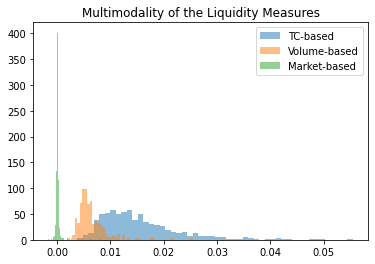

In [33]:
kwargs = dict(alpha=0.5, bins=50,  stacked=True)
plt.hist(liq_measures_all.loc[:, 'percent_quoted_ba'],
         **kwargs, label='TC-based')
plt.hist(liq_measures_all.loc[:, 'turnover_ratio'],
         **kwargs, label='Volume-based')
plt.hist(liq_measures_all.loc[:, 'market_impact'],
         **kwargs, label='Market-based')
plt.title('Multimodality of the Liquidity Measures')
plt.legend()
plt.show()

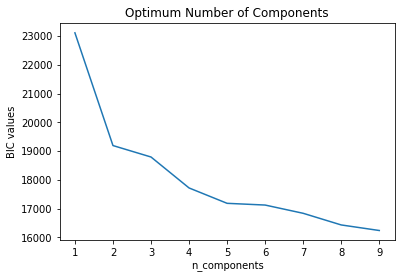

In [34]:
n_components = np.arange(1, 10)
clusters = [GaussianMixture(n, covariance_type='spherical',
                            random_state=0).fit(scaled_liq)
          for n in n_components]
plt.plot(n_components, [m.bic(scaled_liq) for m in clusters])
plt.title('Optimum Number of Components')
plt.xlabel('n_components')
plt.ylabel('BIC values')
plt.show()

In [35]:
def cluster_state(data, nstates):
    gmm = GaussianMixture(n_components=nstates,
                          covariance_type='spherical',
                          init_params='kmeans')
    gmm_fit = gmm.fit(scaled_liq)
    labels = gmm_fit.predict(scaled_liq)
    state_probs = gmm.predict_proba(scaled_liq)
    state_probs_df = pd.DataFrame(state_probs,
                                  columns=['state-1', 'state-2', 'state-3'])
    state_prob_means = [state_probs_df.iloc[:, i].mean()
                        for i in range(len(state_probs_df.columns))]
    if np.max(state_prob_means) == state_prob_means[0]:
        print('State-1 is likely to occur with a probability of {:4f}'
              .format(state_prob_means[0]))
    elif np.max(state_prob_means) == state_prob_means[1]:
        print('State-2 is likely to occur with a probability of {:4f}'
              .format(state_prob_means[1]))
    else:
        print('State-3 is likely to occur with a probability of {:4f}'
              .format(state_prob_means[2]))
    return state_probs

In [36]:
state_probs = cluster_state(scaled_liq, 3)
print(f'State probabilities are {state_probs.mean(axis=0)}')

State-1 is likely to occur with a probability of 0.729087
State probabilities are [0.72908735 0.25465249 0.01626016]


In [37]:
from sklearn.decomposition import PCA

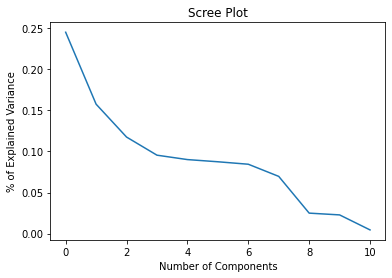

In [38]:
pca = PCA(n_components=11)
components = pca.fit_transform(scaled_liq)
plt.plot(pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('% of Explained Variance')
plt.show()

In [39]:
def gmm_pca(data, nstate):
    pca = PCA(n_components=3)
    components = pca.fit_transform(data)
    mxtd = GaussianMixture(n_components=nstate,
                           covariance_type='spherical')
    gmm = mxtd.fit(components)
    labels = gmm.predict(components)
    state_probs = gmm.predict_proba(components)
    return state_probs, pca

In [40]:
state_probs, pca = gmm_pca(scaled_liq, 3)
print(f'State probabilities are {state_probs.mean(axis=0)}')

State probabilities are [0.7329713  0.25076855 0.01626015]


In [41]:
def wpc():
    state_probs_df = pd.DataFrame(state_probs,
                                  columns=['state-1', 'state-2',
                                           'state-3'])
    state_prob_means = [state_probs_df.iloc[:, i].mean() 
                        for i in range(len(state_probs_df.columns))]
    if np.max(state_prob_means) == state_prob_means[0]:
        print('State-1 is likely to occur with a probability of {:4f}'
              .format(state_prob_means[0]))
    elif np.max(state_prob_means) == state_prob_means[1]:
        print('State-2 is likely to occur with a probability of {:4f}'
              .format(state_prob_means[1]))
    else:
        print('State-3 is likely to occur with a probability of {:4f}'
              .format(state_prob_means[2]))
wpc()

State-1 is likely to occur with a probability of 0.732971


In [42]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, 
                              columns=['PC1', 'PC2', 'PC3'],
                              index=liq_measures_all.columns)
loading_matrix

,PC1,PC2,PC3
liq_ratio,0.116701,-0.115791,-0.196355
Lhh,-0.211827,0.882007,-0.125890
turnover_ratio,0.601041,-0.006381,0.016222
percent_quoted_ba,0.713239,0.140103,0.551385
percent_effective_ba,0.641527,0.154973,0.526933
roll,-0.070192,0.886080,-0.093126
CS_spread,0.013373,-0.299229,-0.092705
amihud,0.849614,-0.020623,-0.488324
florackis,0.710818,0.081948,-0.589693
cet,-0.035736,0.101575,0.001595


## GMCM

<div class="alert alert-info">
<font color=black>

- Copula is a function that maps marginal distribution of individual risks to multivariate distribution, resulting in a joint distribution of many standard uniform random variables. 

- If we are working with a known distribution, such as normal distribution, it is easy to model joint distribution of variables, known as bivariate normal. However, the challenge here is to define the correlation structure between these two variables, and this is the point at which copulas come in

</font>
</div>

In [43]:
from copulae.mixtures.gmc.gmc import GaussianMixtureCopula

In [44]:
_, dim = scaled_liq.shape
gmcm = GaussianMixtureCopula(n_clusters=3, ndim=dim)

In [45]:
gmcm_fit = gmcm.fit(scaled_liq, method='kmeans',
                    criteria='GMCM', eps=0.0001)
state_prob = gmcm_fit.params.prob
print(f'The state {np.argmax(state_prob) + 1} is likely to occur')
print(f'State probabilities based on GMCM are {state_prob}')

The state 2 is likely to occur
State probabilities based on GMCM are [0.33875339 0.34146341 0.3197832 ]


# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://github.com/abdullahkarasan/mlfrm/blob/main/codes/chp_7.ipynb
- Machine Learning for Financial Risk Management with Python Abdullah Karasan

</font>
</div>
    